In [76]:
#libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [77]:
# for reading the csv file
df = pd.read_csv("psyco.csv")

In [78]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [80]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000


In [81]:
# exploring missing values
df.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [82]:
#1
# dropping column line of work as there are many null values
df = df.drop(['line_of_work'],axis=1)

In [83]:
#identifying and fixing unique variables to suitable needs

df.gender.unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

In [84]:
df.age.unique()

array(['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60'],
      dtype=object)

In [85]:
#2
df['age'] = df['age'].replace('Dec-18','0-18')

In [86]:
df['age']

0       19-25
1        0-18
2       19-25
3       19-25
4       19-25
        ...  
1170    40-50
1171    26-32
1172    26-32
1173    26-32
1174    40-50
Name: age, Length: 1175, dtype: object

In [87]:
df['occupation'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [88]:
#3

df['occupation'] = df['occupation'].replace('Medical Professional aiding efforts against COVID-19', 'medical professional')

In [89]:
df['prefer'].unique()

array(['Complete Physical Attendance', 'Work/study from home'],
      dtype=object)

In [90]:
#4

df['prefer'] = df['prefer'].replace({'Complete Physical Attendance':'physical','Work/study from home':'remote'})

In [91]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,physical,Yes
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,physical,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,physical,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,physical,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,physical,Yes


In [92]:
# checking counts of all values in every variable##

for col in df.columns:
    value_counts = df[col].value_counts()
    print(f"Value counts for '{col}':\n{value_counts}\n")

Value counts for 'age':
19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: age, dtype: int64

Value counts for 'gender':
Male                 649
Female               518
Prefer not to say      8
Name: gender, dtype: int64

Value counts for 'occupation':
Working Professional      479
Student in College        358
Entrepreneur              119
Homemaker                  82
medical professional       73
Currently Out of Work      44
Student in School          18
Retired/Senior Citizen      2
Name: occupation, dtype: int64

Value counts for 'time_bp':
7     412
9     343
5     283
11     53
12     51
4      33
Name: time_bp, dtype: int64

Value counts for 'time_dp':
9     326
7     238
5     180
12    169
4     149
11    113
Name: time_dp, dtype: int64

Value counts for 'travel_time':
0.5    699
1.5    343
2.5    111
3.0     22
Name: travel_time, dtype: int64

Value counts for 'easeof_online':
1    329
2    285
4    249
3    239
5     73
Name:

In [93]:
df.shape

(1175, 18)

In [94]:
## converting categorical data to numberical data
## that is age, gender, occupation, prefer and certaindays
age_groups = ['0-18', '19-25', '26-32', '40-50', '50-60', '60+']

# Define a mapping for age groups to numerical values
age_mapping = {
    '0-18': 1,
    '19-25': 2,
    '26-32': 3,
    '33-40':4,
    '40-50': 5,
    '50-60': 6,
    '60+': 7
}

# Assuming 'data' is your DataFrame and 'age' is the column containing age groups
df['age_numeric'] = df['age'].map(age_mapping)

In [95]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,physical,Yes,2
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,physical,No,1
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,physical,Yes,2
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,physical,Yes,2
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,physical,Yes,2


In [96]:
occupation_groups =['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work','Entrepreneur',
       'medical professional']


occupation_mapping = {
   'Student in College': 1,
   'Student in School': 2,
    'Working Professional': 3,
    'Retired/Senior Citizen': 4,
    'Homemaker': 5,
     'Currently Out of Work' : 6,
    'medical professional': 7,
    'Entrepreneur':8
}

df['occupation_numeric'] = df['occupation'].map(occupation_mapping)

In [97]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric,occupation_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,physical,Yes,2,1
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,physical,No,1,2
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,physical,Yes,2,1
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,physical,Yes,2,1
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,physical,Yes,2,1


In [98]:
gender_groups =['Male', 'Female', 'Prefer not to say']


gender_mapping = {
   'Male': 1,
    'Female': 2,
    'Prefer not to say': 3
}

df['gender_numeric'] = df['gender'].map(gender_mapping)

In [99]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric,occupation_numeric,gender_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,1.0,-0.5,-0.5,100,1,physical,Yes,2,1,1
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,1.0,1.0,1.0,1111,1110,physical,No,1,2,1
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,0.5,0.5,0.5,1100,111,physical,Yes,2,1,1
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,0.0,-1.0,-0.5,100,1111,physical,Yes,2,1,1
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0.0,0.5,0.0,1010,1000,physical,Yes,2,1,2


In [100]:
prefer_groups =['physical', 'remote']


prefer_mapping = {
   'physical': 1,
    'remote': 2
}

df['prefer_numeric'] = df['prefer'].map(prefer_mapping)

In [101]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric,occupation_numeric,gender_numeric,prefer_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,-0.5,-0.5,100,1,physical,Yes,2,1,1,1
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,1.0,1.0,1111,1110,physical,No,1,2,1,1
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,0.5,0.5,1100,111,physical,Yes,2,1,1,1
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,-1.0,-0.5,100,1111,physical,Yes,2,1,1,1
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0.5,0.0,1010,1000,physical,Yes,2,1,2,1


In [102]:
certaindays_groups =['Yes', 'No','Maybe']


certaindays_mapping = {
   'Yes': 1,
    'No': 2,
    'Maybe': 3
}

df['certaindays_numeric'] = df['certaindays_hw'].map(certaindays_mapping)

In [103]:
df.certaindays_hw.unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [104]:
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric,occupation_numeric,gender_numeric,prefer_numeric,certaindays_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,-0.5,100,1,physical,Yes,2,1,1,1,1
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,1.0,1111,1110,physical,No,1,2,1,1,2
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,0.5,1100,111,physical,Yes,2,1,1,1,1
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,-0.5,100,1111,physical,Yes,2,1,1,1,1
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0.0,1010,1000,physical,Yes,2,1,2,1,1


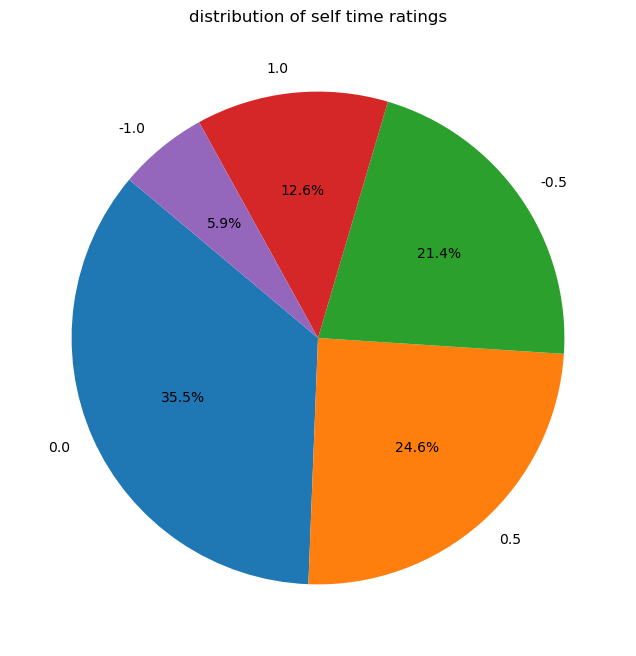

In [165]:
age_counts = df['self_time'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('distribution of self time ratings')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

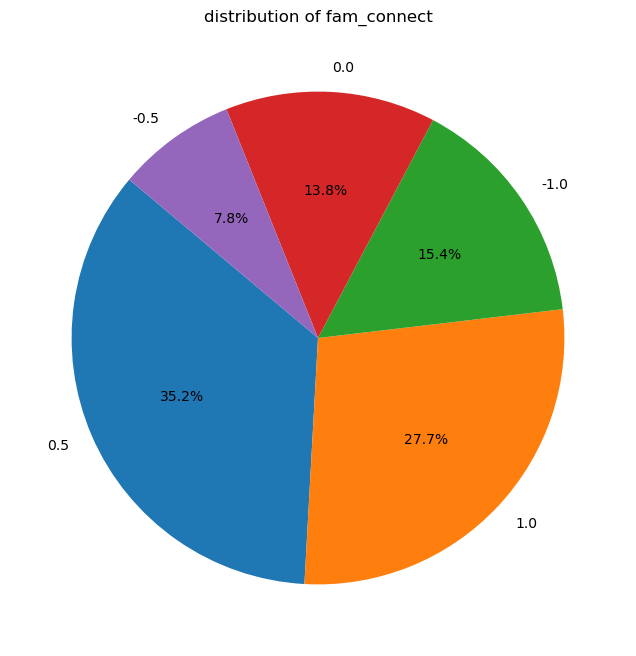

In [163]:
age_counts = df['fam_connect'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('distribution of fam_connect')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

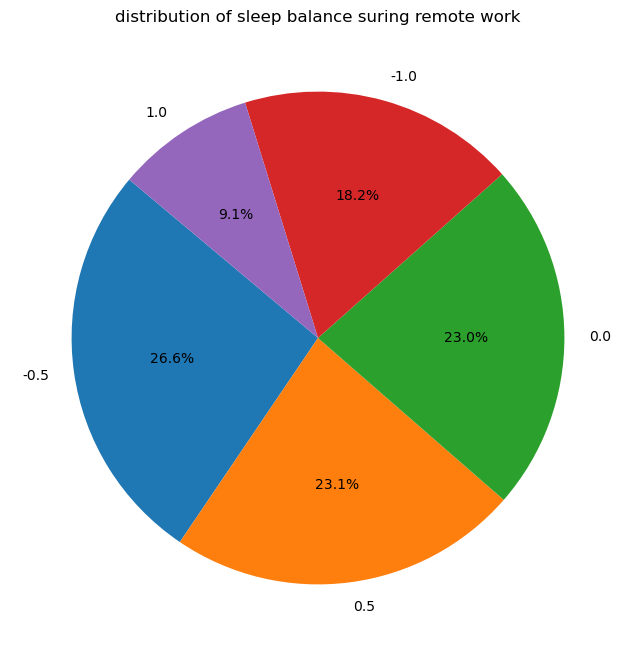

In [161]:
age_counts = df['sleep_bal'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('distribution of sleep balance suring remote work')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

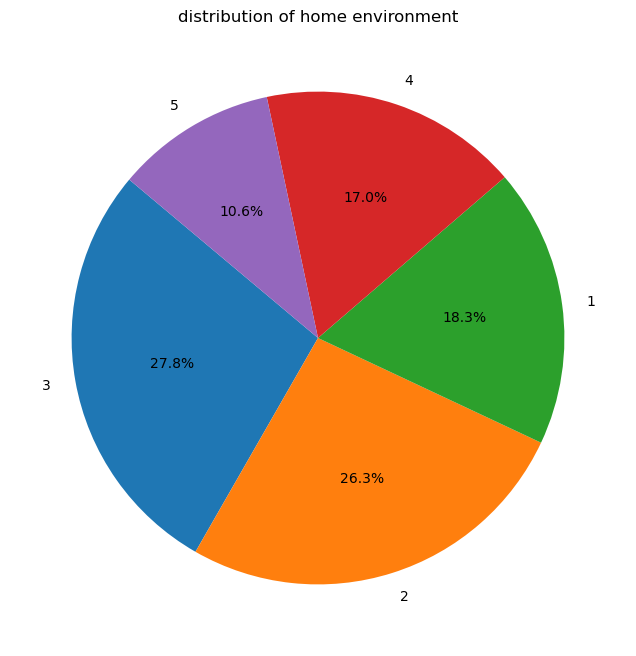

In [160]:
age_counts = df['home_env'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('distribution of home environment')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

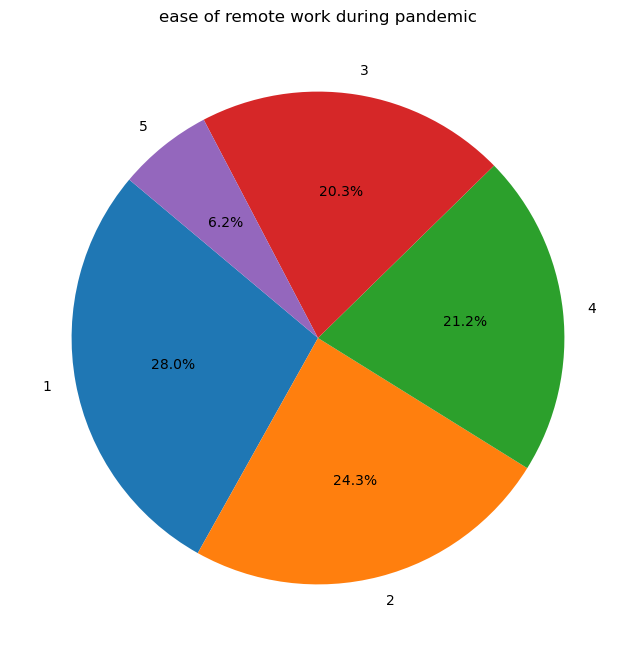

In [159]:
age_counts = df['easeof_online'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('ease of remote work during pandemic')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

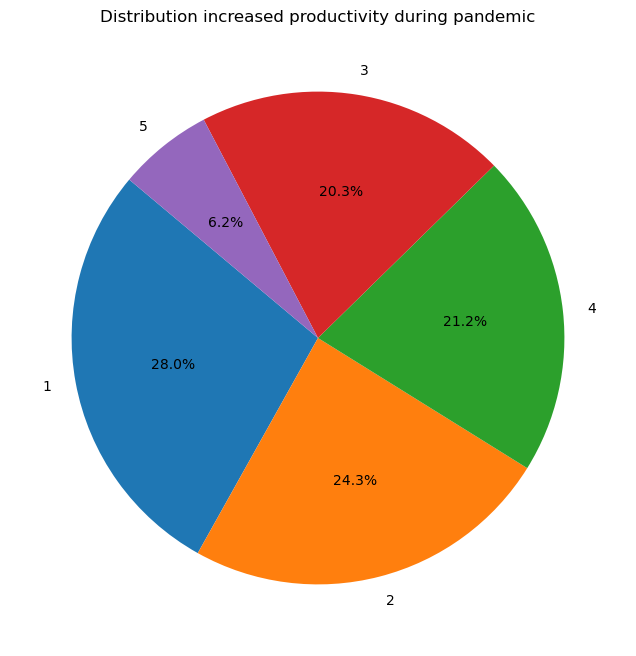

In [155]:
age_counts = df['easeof_online'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution increased productivity during pandemic')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

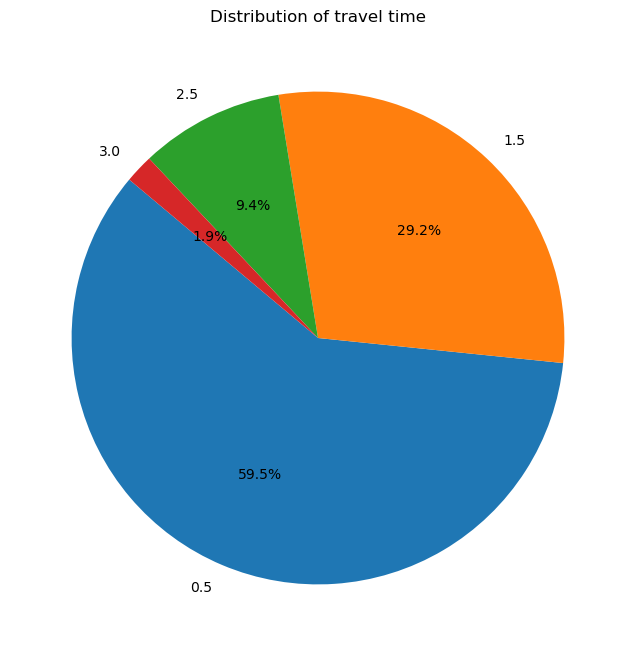

In [152]:
age_counts = df['travel_time'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of travel time')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

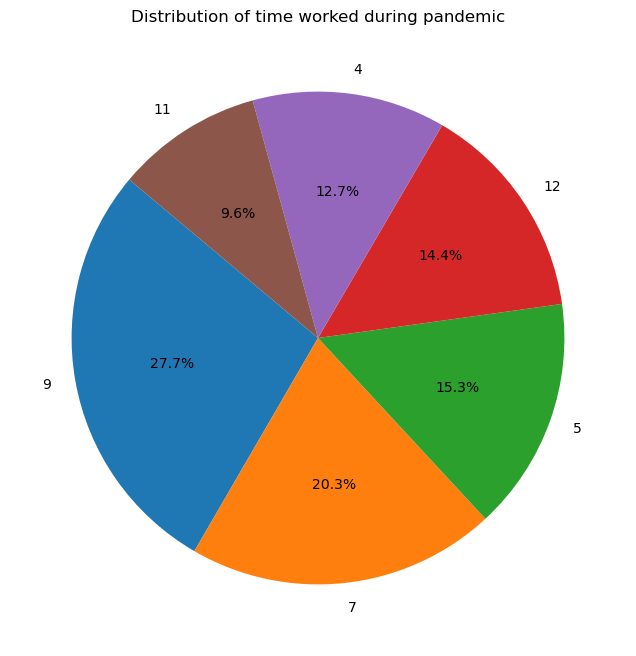

In [150]:
age_counts = df['time_dp'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of time worked during pandemic')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

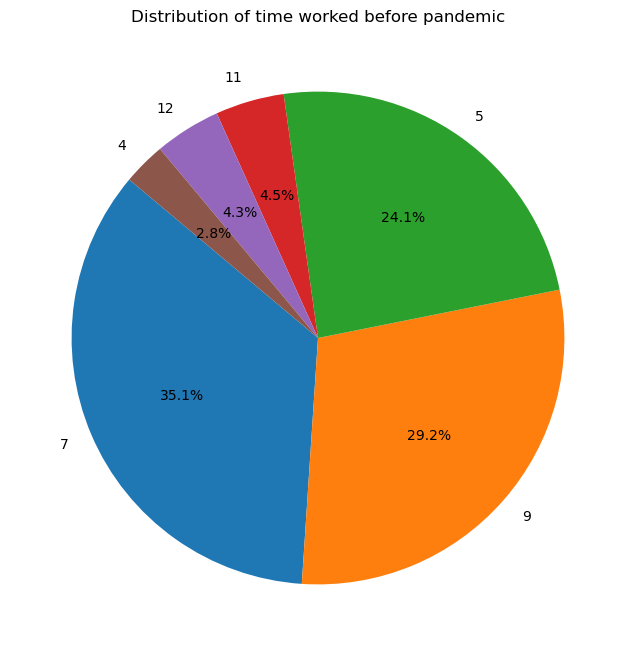

In [149]:
age_counts = df['time_bp'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of time worked before pandemic')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

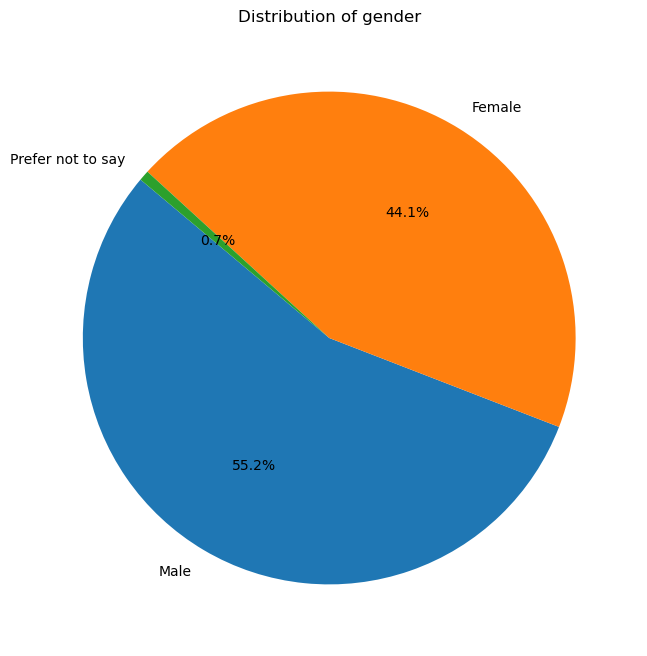

In [147]:
age_counts = df['gender'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of gender')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

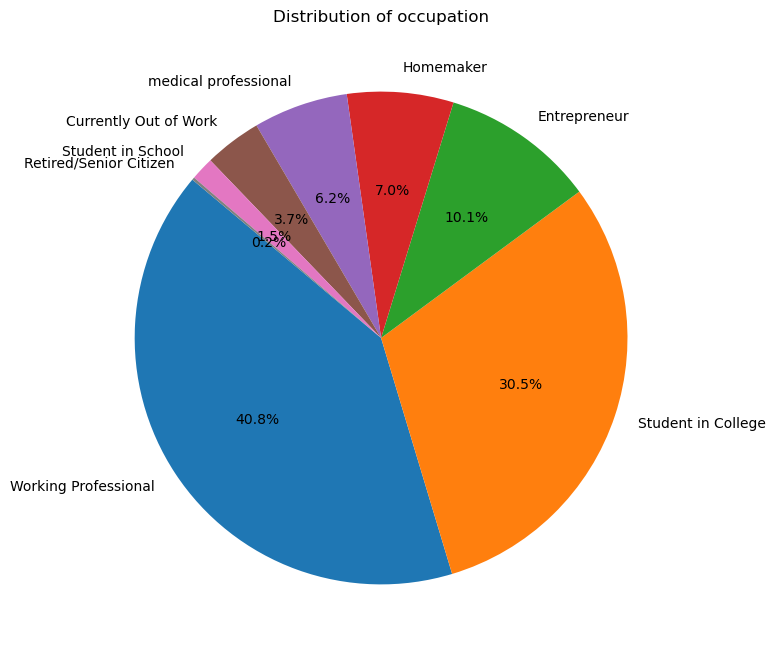

In [146]:


age_counts = df['occupation'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of occupation')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

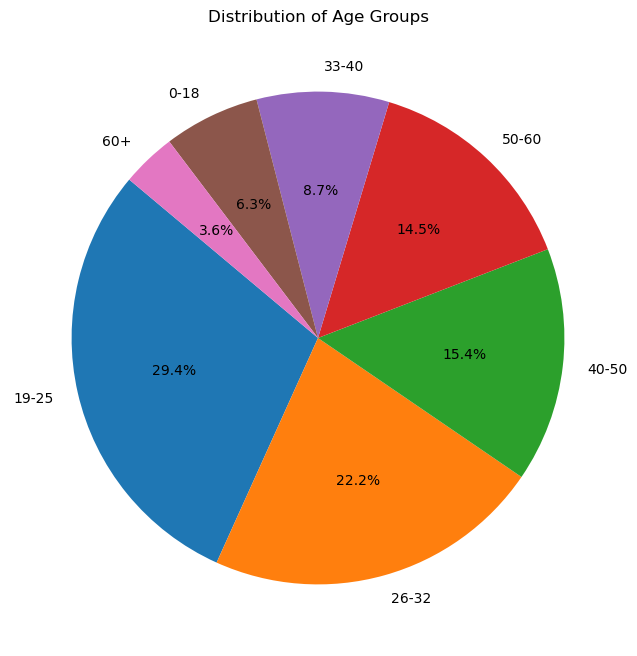

In [144]:

# Assuming 'age' is the column representing different age groups
age_counts = df['age'].value_counts()

# Plotting the pie chart for age distribution
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.ylabel('')  # Remove the y-label for better visualization
plt.show()

<Figure size 2000x2500 with 0 Axes>

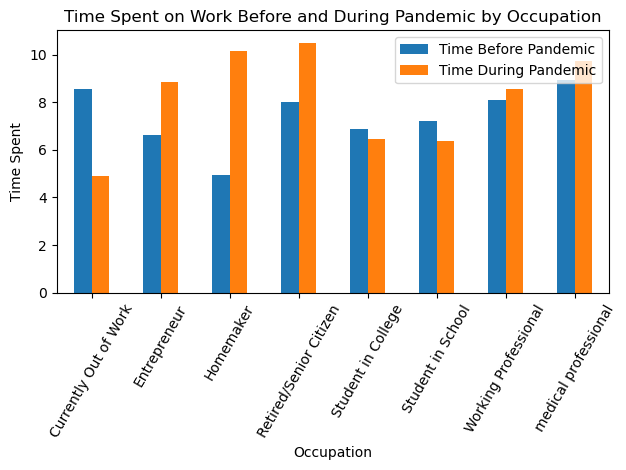

In [105]:
### visualization ###
#1. Time Spent on Work Before and During Pandemic by Occupation

plt.figure(figsize=(20,25))
occupation_groups = df.groupby('occupation')[['time_bp', 'time_dp']].mean()
occupation_groups.plot(kind='bar', stacked=False)
plt.title('Time Spent on Work Before and During Pandemic by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Time Spent')
plt.xticks(rotation=60)
plt.legend(['Time Before Pandemic', 'Time During Pandemic'])
plt.tight_layout()
plt.show()

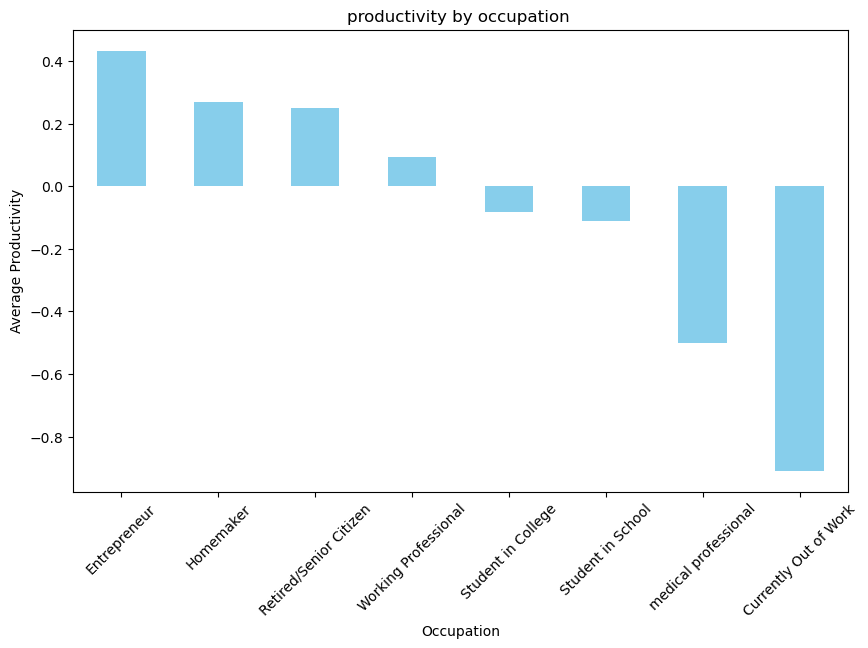

In [106]:
plt.figure(figsize=(10, 6))
occupation_prod = df.groupby('occupation')['prod_inc'].mean().sort_values(ascending=False)
occupation_prod.plot(kind='bar', color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Average Productivity')
plt.title('productivity by occupation ')
plt.xticks(rotation=45)
plt.show()

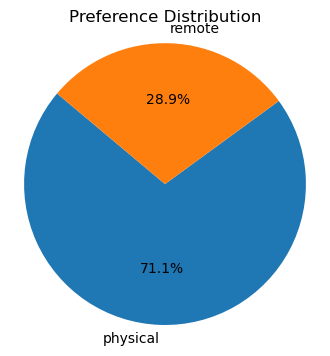

In [107]:
preference_counts = df['prefer'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preference Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

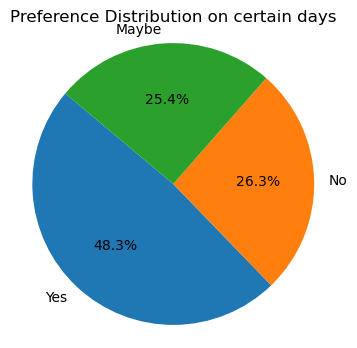

In [108]:

preference_counts = df['certaindays_hw'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preference Distribution on certain days')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

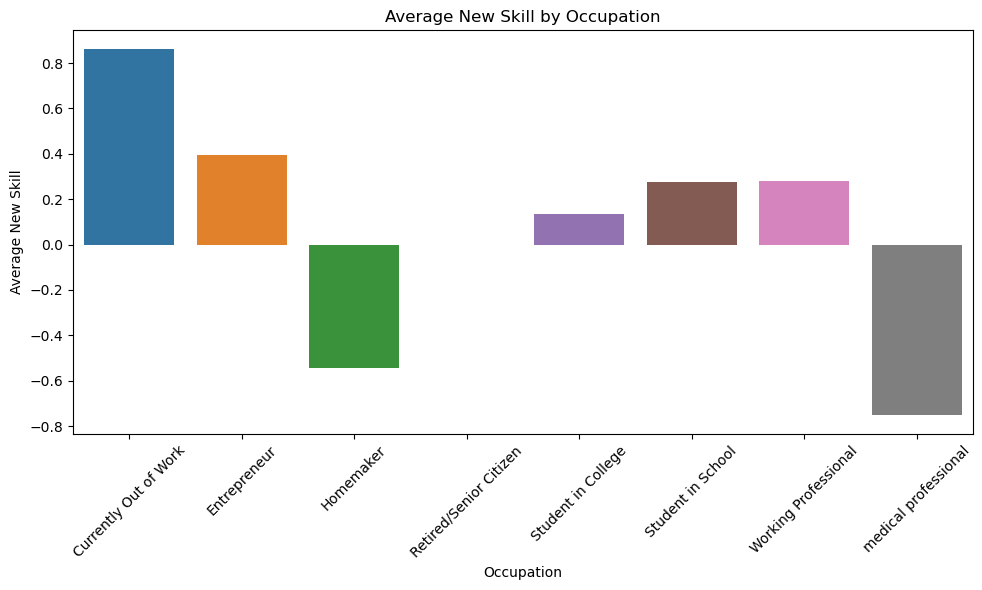

In [109]:
# Group data
# Calculate average 'new_skill' for each 'occupation'
occupation_new_skill = df.groupby('occupation')['new_skill'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='occupation', y='new_skill', data=occupation_new_skill)
plt.title('Average New Skill by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average New Skill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

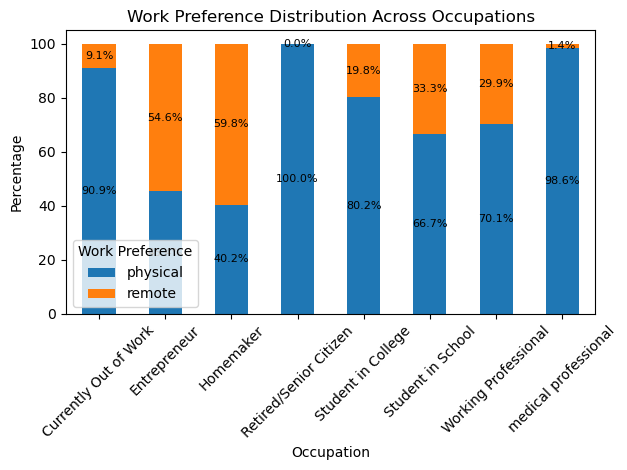

In [110]:
#3 .Productivity Increase by Preference for Working from Home

occupation_prefer = pd.crosstab(df['occupation'], df['prefer'])

# Calculate percentages within each occupation
occupation_prefer_pct = occupation_prefer.div(occupation_prefer.sum(axis=1), axis=0) * 100

# Plotting a stacked bar chart with percentages
plt.figure(figsize=(10, 6))
occupation_prefer_pct.plot(kind='bar', stacked=True, )

# Add percentage labels with better visibility
for i in range(len(occupation_prefer_pct)):
    total = 0
    for val in occupation_prefer_pct.iloc[i]:
        plt.text(i, total + val / 2, f'{val:.1f}%', ha='center', va='center', color='black', fontsize=8)
        total += val

plt.title('Work Preference Distribution Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Work Preference')
plt.tight_layout()
plt.show()

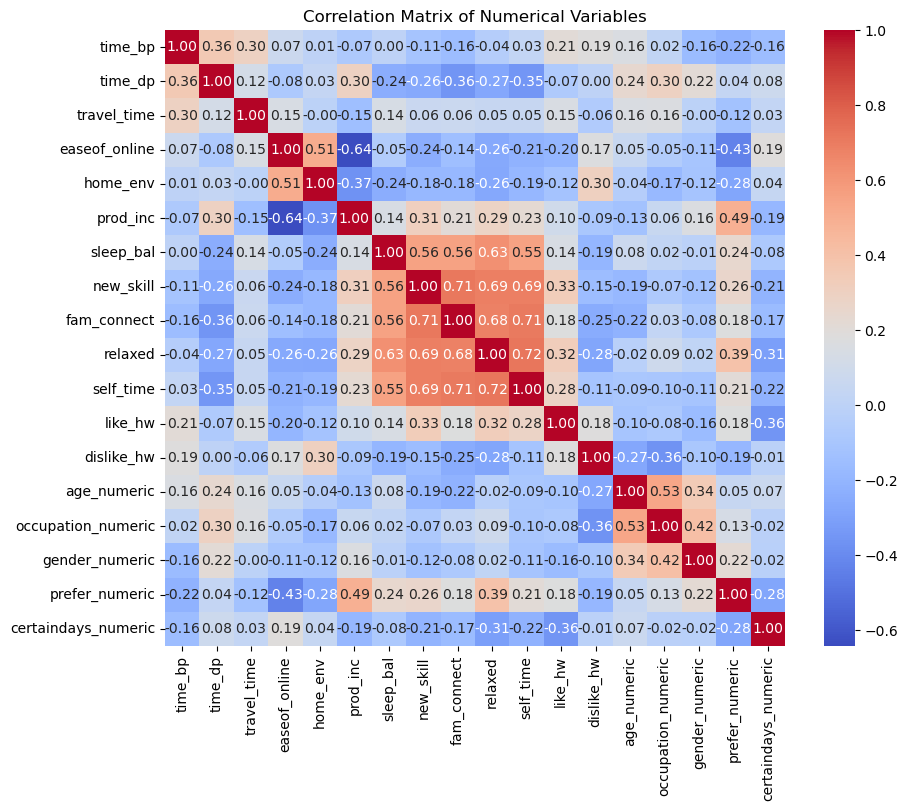

In [111]:
numerical_data = df.select_dtypes(include='number')

# Creating a correlation matrix for numerical variables
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [112]:
# basic stats #
stats = df.describe( include = 'all')
stats_t = stats.T
print(stats_t)

                      count unique                   top freq        mean  \
age                    1175      7                 19-25  345         NaN   
gender                 1175      3                  Male  649         NaN   
occupation             1175      8  Working Professional  479         NaN   
time_bp              1175.0    NaN                   NaN  NaN    7.415319   
time_dp              1175.0    NaN                   NaN  NaN    7.971915   
travel_time          1175.0    NaN                   NaN  NaN     1.02766   
easeof_online        1175.0    NaN                   NaN  NaN    2.533617   
home_env             1175.0    NaN                   NaN  NaN     2.75234   
prod_inc             1175.0    NaN                   NaN  NaN    0.008936   
sleep_bal            1175.0    NaN                   NaN  NaN   -0.108936   
new_skill            1175.0    NaN                   NaN  NaN    0.146809   
fam_connect          1175.0    NaN                   NaN  NaN    0.260426   

In [113]:
df.to_csv('withnumerics.csv', index=False)

In [114]:
dp = pd.read_csv("withnumerics.csv")

In [115]:
dp.head()

dp = dp.drop(['age'],axis=1)
dp = dp.drop(['gender'],axis=1)
dp = dp.drop(['occupation'],axis=1)
dp = dp.drop(['prefer'],axis=1)
dp = dp.drop(['certaindays_hw'],axis=1)

In [116]:
dp.head()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,age_numeric,occupation_numeric,gender_numeric,prefer_numeric,certaindays_numeric
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,2,1,1,1,1
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,1,2,1,1,2
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,2,1,1,1,1
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,2,1,1,1,1
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,2,1,2,1,1


In [117]:
#### classification
X = dp.drop('gender_numeric', axis=1)
y = dp['gender_numeric']


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
#1.logistical regression

logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.7957446808510639


In [121]:
precision = precision_score(y_test, y_pred_logreg, average='weighted')
recall = recall_score(y_test, y_pred_logreg, average='weighted')
f1 = f1_score(y_test, y_pred_logreg, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7981984266165213
Recall: 0.7957446808510639
F1 Score: 0.7872366921915159


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


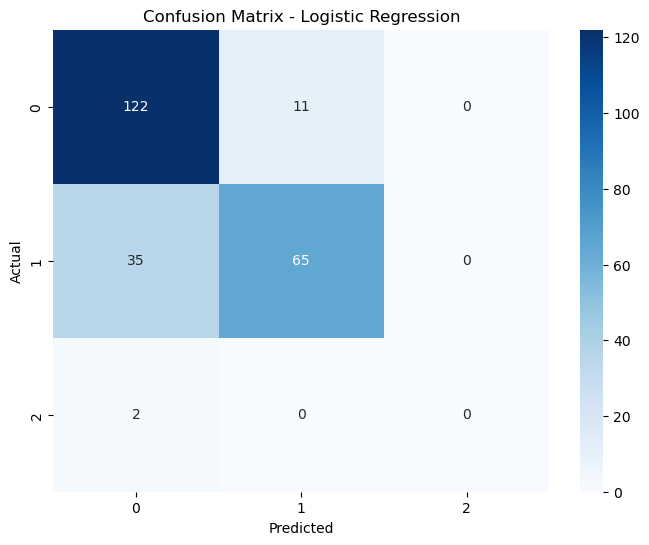

In [122]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [123]:
#2. random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8936170212765957


In [124]:
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Precision: 0.9019391327767305
Recall: 0.8936170212765957
F1 Score: 0.8875724803362814


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


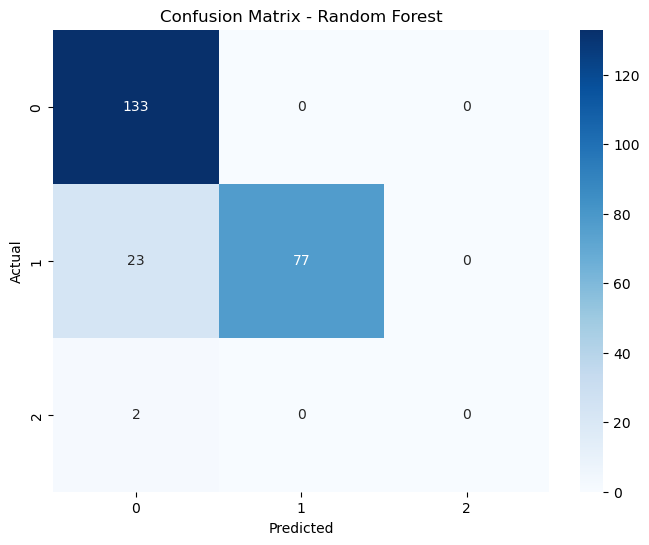

In [125]:
# Calculate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as an image for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [126]:
#3 support vector machine
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7957446808510639


In [127]:
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Precision: 0.808736969115586
Recall: 0.7957446808510639
F1 Score: 0.7844214792299898


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


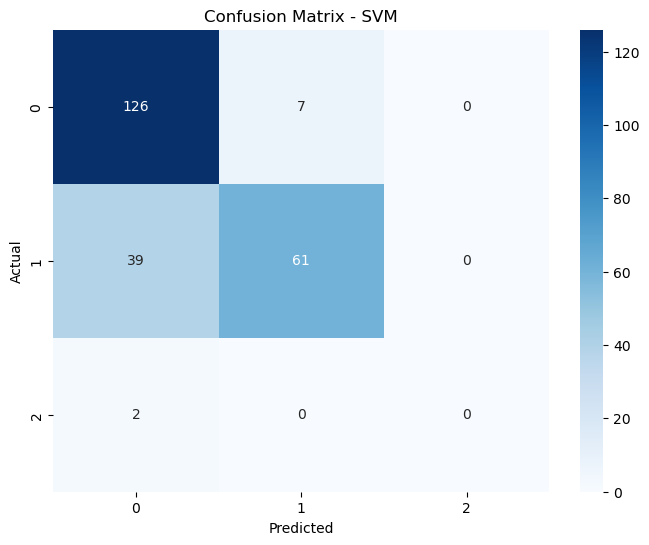

In [128]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix as an image for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:

from tabulate import tabulate

# Create a dictionary containing the metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_logreg, precision, recall, f1],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'Support Vector Machine': [accuracy_svm, precision_svm, recall_svm, f1_svm]
}

# Display the metrics in a table format
print(tabulate(metrics, headers='keys'))

Metric       Logistic Regression    Random Forest    Support Vector Machine
---------  ---------------------  ---------------  ------------------------
Accuracy                0.795745         0.893617                  0.795745
Precision               0.798198         0.901939                  0.808737
Recall                  0.795745         0.893617                  0.795745
F1 Score                0.787237         0.887572                  0.784421


In [130]:
da = pd.read_csv('withnumerics.csv')

In [131]:
da.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,age_numeric,occupation_numeric,gender_numeric,prefer_numeric,certaindays_numeric
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,-0.5,100,1,physical,Yes,2,1,1,1,1
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,1.0,1111,1110,physical,No,1,2,1,1,2
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,0.5,1100,111,physical,Yes,2,1,1,1,1
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,-0.5,100,1111,physical,Yes,2,1,1,1,1
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0.0,1010,1000,physical,Yes,2,1,2,1,1


In [132]:
da = da.drop(['age'],axis=1)
da = da.drop(['gender'],axis=1)
da = da.drop(['occupation'],axis=1)
da = da.drop(['prefer'],axis=1)
da = da.drop(['certaindays_hw'],axis=1)

In [133]:
X = da.drop('self_time', axis=1)
y = da['self_time']


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [136]:
number_of_predictors = len(model.coef_)
print("Number of predictors:", number_of_predictors)

Number of predictors: 17


In [137]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of observations
k =  17

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.1199044816694267
R-squared: 0.5982206783451192
Adjusted R-squared: 0.5667448789528013


In [138]:
dg = pd.read_csv('withnumerics.csv')

In [139]:
dg = dg.drop(['age'],axis=1)
dg = dg.drop(['gender'],axis=1)
dg = dg.drop(['occupation'],axis=1)
dg = dg.drop(['prefer'],axis=1)
dg = dg.drop(['certaindays_hw'],axis=1)

In [140]:
X = df[['time_bp', 'time_dp', 'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw', 'dislike_hw', 'age_numeric', 'occupation_numeric', 'gender_numeric', 'prefer_numeric', 'certaindays_numeric']]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

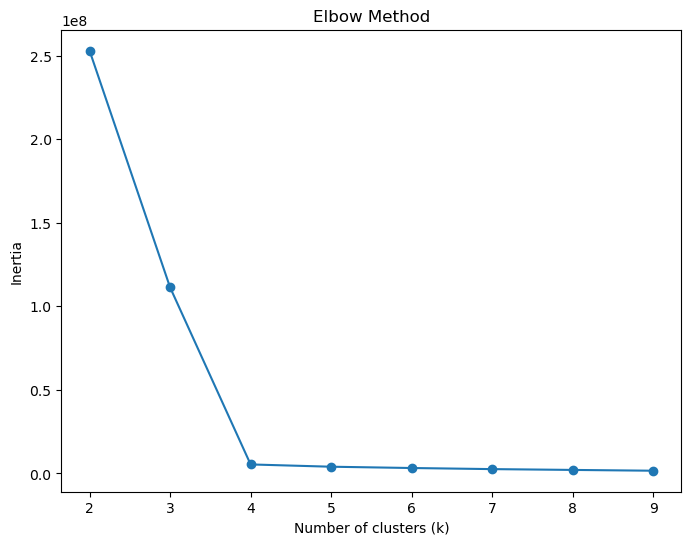

In [141]:

# Initialize a range of clusters to test
k_values = range(2, 10)  # Try different numbers of clusters

# Calculate inertia for different k values
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [142]:
k = 4
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=4)

In [143]:
cluster_labels = kmeans.labels_

# Add cluster labels to your dataset
df['cluster'] = cluster_labels

# View the results
print(df['cluster'].value_counts())  # Count of data points in each cluster
print(df.groupby('cluster').mean()) 

1    510
2    270
0    213
3    182
Name: cluster, dtype: int64
          time_bp   time_dp  travel_time  easeof_online  home_env  prod_inc  \
cluster                                                                       
0        6.737089  8.629108     0.868545       2.239437  2.370892  0.154930   
1        7.994118  7.964706     1.007843       2.394118  2.864706  0.066667   
2        7.174074  7.533333     1.268519       2.292593  2.259259  0.022222   
3        6.945055  7.873626     0.912088       3.626374  3.615385 -0.343407   

         sleep_bal  new_skill  fam_connect   relaxed  self_time      like_hw  \
cluster                                                                        
0        -0.143192  -0.068075     0.349765 -0.084507  -0.028169    79.399061   
1        -0.155882   0.153922     0.233333  0.000980   0.134314  1056.596078   
2         0.148148   0.537037     0.540741  0.492593   0.287037  1083.877778   
3        -0.318681  -0.200549    -0.184066 -0.403846  -0.2335

C:\Users\AMEED SAREM\AppData\Local\Temp\ipykernel_23072\4261248499.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('cluster').mean())
